# Fitting Data with a Neural Network Trained Using Batch Training


<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch02_DNN_regression/ec02_4_dnn2_reg_batches/dnn2_reg_batches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<strong>If using Colab/Kaggle:</strong> You need to copy the auxiliary *.csv and *.py files from the
<a href="https://github.com/DeepTrackAI/DeepLearningCrashCourse/tree/main/Ch02_DNN_regression/ec02_4_dnn2_reg_batches">notebook folder</a>
in GitHub to the Colab/Kaggle work directory.
</div>

This notebook provides you with a complete code example that loads the data contained in the `data_reg_2d_nonlinear.csv` file, trains a two-layer neural network to fit them with batch training, and finally uses the trained network to predict the values of the data in the file `data_reg_2d_nonlinear_test.csv`.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 2-4 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_nonlinear.csv")

## Implementing a Dense Neural Network

Implement the sigmoidal function ...

In [2]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [3]:
def dnn2_reg(wa, wb, x):
    """Two-layer dense neural network for classification."""
    return sigmoid(x @ wa) @ wb

... define the number of neurons in the first layer ...

In [4]:
num_neurons = 10

... randomly initialize its weights ...

In [5]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons))  # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1))  # Input weights layer 2.

... obtain its predictions for the input data ...

In [6]:
y_p = dnn2_reg(wa, wb, x)

... and plot its predictions.

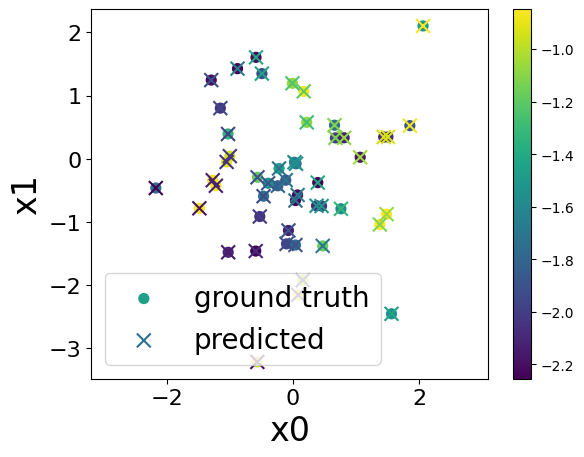

In [7]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Plotting the Predictions Versus Ground Truth Values

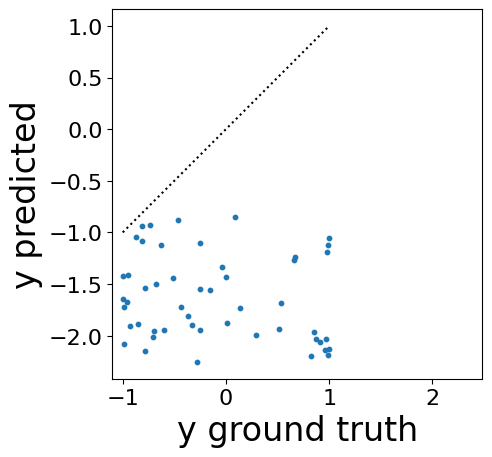

In [8]:
from plotting import plot_pred_vs_gt

plot_pred_vs_gt(y_gt, y_p=dnn2_reg(wa, wb, x))

## Training with Mini-Batches

Implement the first derivative of the sigmoid function ...

In [9]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm with mini-batches ...

In [10]:
from numpy import mean, reshape, sum, transpose, zeros
from numpy.random import permutation

num_samples = len(x)
num_batches = 10
batch_size = int(num_samples / num_batches)
num_epochs = 10 ** 4
eta = .1  # Learning rate.

mse_train = zeros((num_epochs,))
for epoch in range(num_epochs):
    # Permute samples.
    permuted_order_samples = permutation(num_samples)
    x_permuted = x[permuted_order_samples]
    y_gt_permuted = y_gt[permuted_order_samples]

    for batch_start in range(0, num_samples, batch_size):
        dwa = zeros(wa.shape)  # Initialize weight increments layer 1.
        dwb = zeros(wb.shape)  # Initialize weight increments layer 2.
        for selected in range(batch_start, batch_start + batch_size):
            x_selected = reshape(x_permuted[selected], (1, -1))
            y_gt_selected = reshape(y_gt_permuted[selected], (1, -1))

            # Detailed neural network calculation.
            x_selected_a = x_selected  # Input layer 1.
            p_a = x_selected_a @ wa  # Activation potential layer 1.
            y_selected_a = sigmoid(p_a)  # Output layer 1.

            x_selected_b = y_selected_a  # Input layer 2.
            p_b = x_selected_b @ wb  # Activation potential layer 2.
            y_selected_b = p_b  # Output layer 2 (output neuron).
        
            y_p_selected = y_selected_b
        
            # Update weight increments.
            error = y_p_selected - y_gt_selected

            delta_b = error * 1
            dwb = dwb - eta * delta_b * transpose(x_selected_b)

            delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
            dwa = dwa - eta * delta_a * transpose(x_selected_a)

        wa = wa + dwa / batch_size  # Update weights layer 1.
        wb = wb + dwb / batch_size  # Update weights layer 2.

    y_p = dnn2_reg(wa, wb, x)
    mse_train[epoch] = mean((y_p - y_gt) ** 2)

    print(f"epoch={epoch} MSE={mse_train[epoch]:.4f}")

epoch=0 MSE=1.0358
epoch=1 MSE=0.6876
epoch=2 MSE=0.5831
epoch=3 MSE=0.5359
epoch=4 MSE=0.5143
epoch=5 MSE=0.5042
epoch=6 MSE=0.5212
epoch=7 MSE=0.4966
epoch=8 MSE=0.4844
epoch=9 MSE=0.4846
epoch=10 MSE=0.4703
epoch=11 MSE=0.4820
epoch=12 MSE=0.4604
epoch=13 MSE=0.4599
epoch=14 MSE=0.4523
epoch=15 MSE=0.4642
epoch=16 MSE=0.4437
epoch=17 MSE=0.4564
epoch=18 MSE=0.4404
epoch=19 MSE=0.4317
epoch=20 MSE=0.4241
epoch=21 MSE=0.4211
epoch=22 MSE=0.4177
epoch=23 MSE=0.4379
epoch=24 MSE=0.4125
epoch=25 MSE=0.4033
epoch=26 MSE=0.4004
epoch=27 MSE=0.4043
epoch=28 MSE=0.3927
epoch=29 MSE=0.3897
epoch=30 MSE=0.3842
epoch=31 MSE=0.3819
epoch=32 MSE=0.3795
epoch=33 MSE=0.3717
epoch=34 MSE=0.3891
epoch=35 MSE=0.3759
epoch=36 MSE=0.3611
epoch=37 MSE=0.3597
epoch=38 MSE=0.3582
epoch=39 MSE=0.3519
epoch=40 MSE=0.3533
epoch=41 MSE=0.3464
epoch=42 MSE=0.3442
epoch=43 MSE=0.3450
epoch=44 MSE=0.3383
epoch=45 MSE=0.3372
epoch=46 MSE=0.3364
epoch=47 MSE=0.3264
epoch=48 MSE=0.3277
epoch=49 MSE=0.3206
epoch=50 M

... and plot its predictions ...

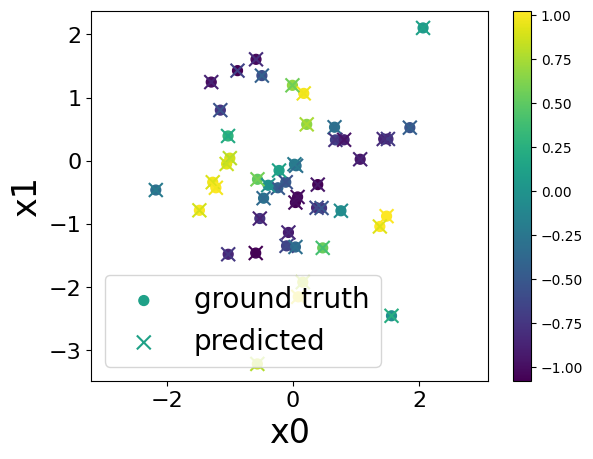

In [11]:
plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

... its predictions versus ground truth ...

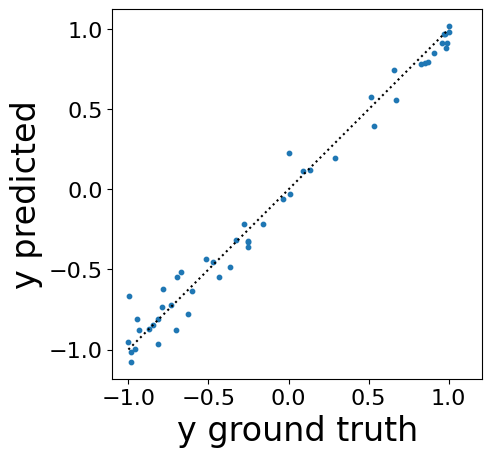

In [12]:
plot_pred_vs_gt(y_gt, y_p=dnn2_reg(wa, wb, x))

... and the training metrics.

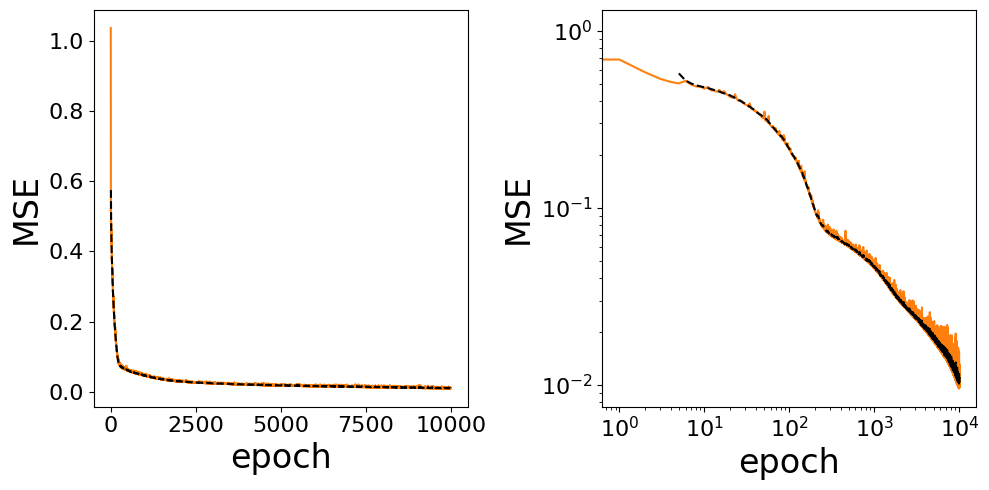

In [13]:
from plotting import plot_mse

plot_mse(mse_train)